Brand Sentiment Analysis from Amazon Reviews

Dataset Details

Link : https://amazon-reviews-2023.github.io/main.html

The dataset used in the brand sentiment analysis is the Amazon Reviews dataset collected in 2023 by McAuley Lab, featuring a substantial expansion to 571.54 million reviews, a 245.2% increase from previous versions. It spans interactions from May 1996 to September 2023 and includes richer item metadata and fine-grained timestamps. The dataset encompasses comprehensive user reviews with fields such as ratings, text, images, and helpful votes, along with detailed item metadata including product descriptions, prices, images, and hierarchical categories. The data has been cleaned and standardized, providing a robust foundation for benchmarking and analyzing brand sentiment across a wide range of product categories.

Dataset Importing

In [44]:
import json

updatedData = '/Users/sahalzulphi/Downloads/ADA Project/updated_products.json'

In [45]:
import pandas as pd

In [46]:
df = pd.read_json(updatedData)

In [47]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,category,brand,textid,helpful_vod_purchase,helpfute,timeverified_purchase
0,5,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2018-02-22 16:31:48.692,0.0,1.0,Tools & Home Improvement,Geesta,NaN,NaN,NaN,NaN
1,5,excellent product,Little on the thin side,[],B07DD2DMXB,B07DD37QPZ,AHWWLSPCJMALVHDDVSUGICL6RUCA,2022-10-02 21:41:03.446,0.0,1.0,Tools & Home Improvement,Unknown,NaN,NaN,NaN,NaN
2,5,Happy customer!,"Quick delivery, fixed the issue!",[],B082W3Z9YK,B082W3Z9YK,AHZIJGKEWRTAEOZ673G5B3SNXEGQ,2020-12-06 03:30:35.363,0.0,1.0,Tools & Home Improvement,Unknown,NaN,NaN,NaN,NaN
3,5,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,2018-08-12 20:03:04.306,0.0,1.0,Amazon Home,FilterLogic,NaN,NaN,NaN,NaN
4,5,Dryer parts,Easy to install got the product expected to re...,[],B08C9LPCQV,B08C9LPCQV,AELFJFAXQERUSMTXJQ6SYFFRDWMA,2021-05-05 01:03:23.754,0.0,1.0,Tools & Home Improvement,Unknown,NaN,NaN,NaN,NaN


Pre-Proccessing and Data Exploration

In [48]:
df.head(1)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,category,brand,textid,helpful_vod_purchase,helpfute,timeverified_purchase
0,5,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2018-02-22 16:31:48.692,0.0,1.0,Tools & Home Improvement,Geesta,NaN,NaN,NaN,NaN


In [49]:
print(len(df['brand']))

310945


In [50]:
print(len(df['brand'].unique()))

4448


In [51]:
dfNew = df[df['brand'].str.lower() != 'unknown']

In [52]:
print(len(dfNew['brand']))

215572


In [53]:
dfNew.shape

(215572, 16)

In [54]:
dfNew.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'category', 'brand',
       'textid', 'helpful_vod_purchase', 'helpfute', 'timeverified_purchase'],
      dtype='object')

In [55]:
dfNew.isnull().sum()

rating                        0
title                         0
text                          3
images                        5
asin                          5
parent_asin                   5
user_id                       4
timestamp                     1
helpful_vote                  2
verified_purchase             2
category                   2669
brand                         5
textid                   215571
helpful_vod_purchase     215571
helpfute                 215572
timeverified_purchase    215571
dtype: int64

In [56]:
dfNew = dfNew.drop(columns=['timeverified_purchase','helpfute','helpful_vod_purchase','textid'])

In [57]:
dfNew.isnull().sum()

rating                  0
title                   0
text                    3
images                  5
asin                    5
parent_asin             5
user_id                 4
timestamp               1
helpful_vote            2
verified_purchase       2
category             2669
brand                   5
dtype: int64

In [58]:
dfNew['Average_Rating'] = dfNew.groupby('brand')['rating'].transform('mean')

In [59]:
dfNew.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,category,brand,Average_Rating
0,5,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2018-02-22 16:31:48.692,0.0,1.0,Tools & Home Improvement,Geesta,4.629523
3,5,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,2018-08-12 20:03:04.306,0.0,1.0,Amazon Home,FilterLogic,4.651865
5,5,DO NOT purchase this ice machine.,After buying this ice machine just 15 months a...,[],B08D6RFV6D,B099ZKQJHK,AEUH4EH6XHROLT7UZPUYU2YKTYMA,2022-09-13 14:21:18.875,0.0,1.0,Industrial & Scientific,COOLLIFE,3.727273
7,5,Five Stars,Part came quickly and fit my LG dryer. Thanks!,[],B00AF7WZTM,B00AF7WZTM,AH6PLOGWYIVIWLJTY756BHNFD4YA,2016-11-28 11:58:20.000,0.0,1.0,Appliances,LG,4.377246
8,5,Five Stars,Always arrive in a fast manner. Descriptions ...,[],B001H05AXY,B001H05AXY,AGCIVNDDRX3PXIUINEG4NCRGWCRA,2015-03-23 17:14:10.000,0.0,1.0,Tools & Home Improvement,AMANA,3.446809


In [60]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215572 entries, 0 to 310944
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             215572 non-null  int64         
 1   title              215572 non-null  object        
 2   text               215569 non-null  object        
 3   images             215567 non-null  object        
 4   asin               215567 non-null  object        
 5   parent_asin        215567 non-null  object        
 6   user_id            215568 non-null  object        
 7   timestamp          215571 non-null  datetime64[ns]
 8   helpful_vote       215570 non-null  float64       
 9   verified_purchase  215570 non-null  float64       
 10  category           212903 non-null  object        
 11  brand              215567 non-null  object        
 12  Average_Rating     215567 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), objec

Sentiment Calculation

In [61]:
dfNew['sentiment'] = dfNew['rating'].apply(lambda x: 1 if x > 3 else 0)

In [62]:
dfNew.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,category,brand,Average_Rating,sentiment
0,5,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2018-02-22 16:31:48.692,0.0,1.0,Tools & Home Improvement,Geesta,4.629523,1
3,5,Amazing value,I wasn't sure whether these were worth it or n...,[],B078W2BJY8,B078W2BJY8,AFGUPTDFAWOHHL4LZDV27ERDNOYQ,2018-08-12 20:03:04.306,0.0,1.0,Amazon Home,FilterLogic,4.651865,1
5,5,DO NOT purchase this ice machine.,After buying this ice machine just 15 months a...,[],B08D6RFV6D,B099ZKQJHK,AEUH4EH6XHROLT7UZPUYU2YKTYMA,2022-09-13 14:21:18.875,0.0,1.0,Industrial & Scientific,COOLLIFE,3.727273,1
7,5,Five Stars,Part came quickly and fit my LG dryer. Thanks!,[],B00AF7WZTM,B00AF7WZTM,AH6PLOGWYIVIWLJTY756BHNFD4YA,2016-11-28 11:58:20.000,0.0,1.0,Appliances,LG,4.377246,1
8,5,Five Stars,Always arrive in a fast manner. Descriptions ...,[],B001H05AXY,B001H05AXY,AGCIVNDDRX3PXIUINEG4NCRGWCRA,2015-03-23 17:14:10.000,0.0,1.0,Tools & Home Improvement,AMANA,3.446809,1


In [63]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Data Visualization

In [64]:
import matplotlib.pyplot as plt
brand_avg_rating = dfNew.groupby('brand')['Average_Rating'].mean().sort_values(ascending=False)

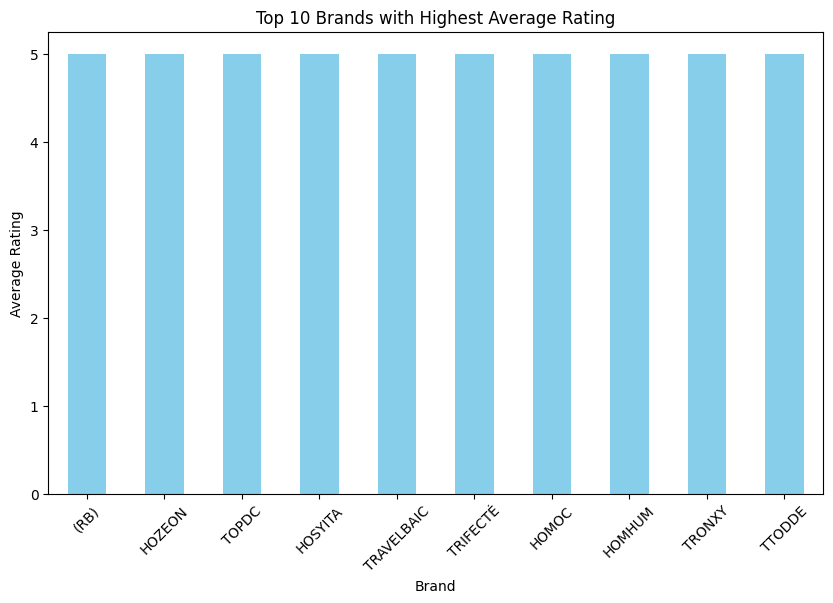

In [65]:
topBrands = brand_avg_rating.head(10)

plt.figure(figsize=(10, 6))
topBrands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands with Highest Average Rating')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

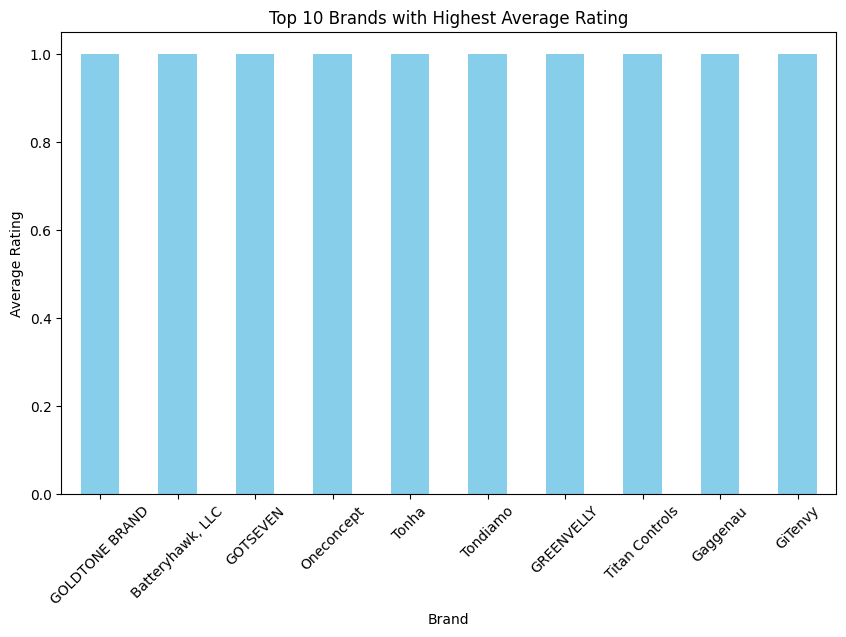

In [66]:
lastBrands = brand_avg_rating.tail(10)

plt.figure(figsize=(10, 6))
lastBrands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Brands with Highest Average Rating')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

In [67]:
fiveRating = dfNew[dfNew['rating'] == 5]

fiveRatingCount = fiveRating.groupby('brand')['rating'].count()
fiveRating5 = fiveRatingCount.sort_values(ascending=False).head(5)
print("Top 5 brands with the most 5-star ratings:")
print(fiveRating5)

Top 5 brands with the most 5-star ratings:
brand
GE            5151
Frigidaire    5053
Whirlpool     5049
Waterdrop     5048
K&J           3338
Name: rating, dtype: int64


In [68]:
fiveRating = dfNew[dfNew['rating'] == 1]

fiveRatingCount = fiveRating.groupby('brand')['rating'].count()
fiveRating5 = fiveRatingCount.sort_values(ascending=False).head(5)
print("Top 5 brands with the most 1-star ratings:")
print(fiveRating5)

Top 5 brands with the most 1-star ratings:
brand
Frigidaire    662
GE            504
SAMSUNG       478
Waterdrop     318
Whirlpool     315
Name: rating, dtype: int64


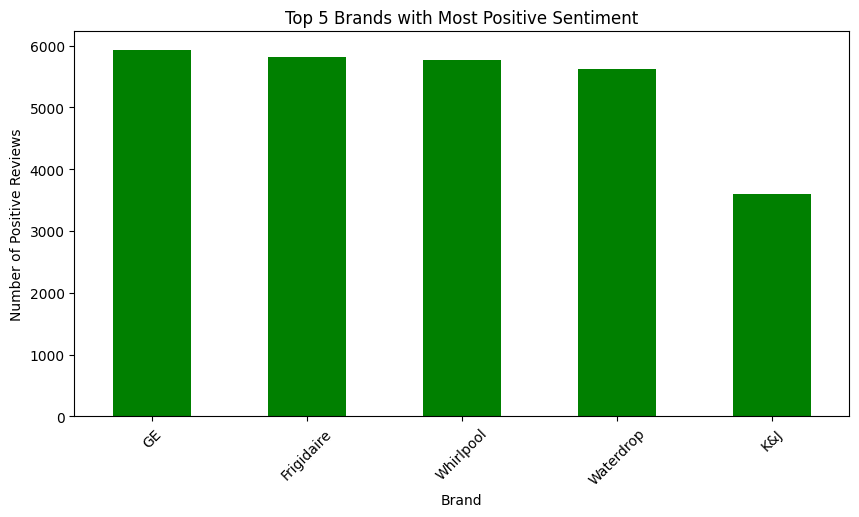

In [69]:
positiveSentiment = dfNew[dfNew['sentiment'] == 1]
positiveSentiment5 = positiveSentiment.groupby('brand').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
positiveSentiment5.plot(kind='bar', color='green')
plt.title('Top 5 Brands with Most Positive Sentiment')
plt.xlabel('Brand')
plt.ylabel('Number of Positive Reviews')
plt.xticks(rotation=45)
plt.show()




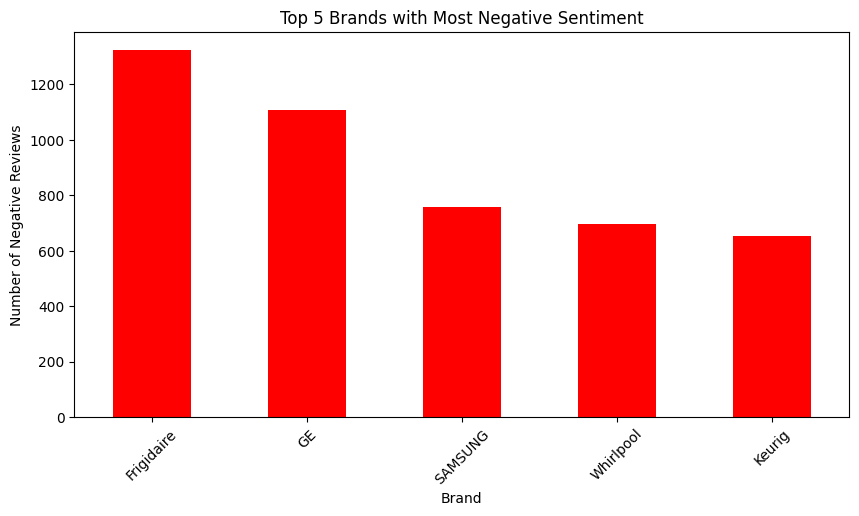

In [70]:
negativeSentiment = dfNew[dfNew['sentiment'] == 0]
negativeSentiment = negativeSentiment.groupby('brand').size().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
negativeSentiment.plot(kind='bar', color='red')
plt.title('Top 5 Brands with Most Negative Sentiment')
plt.xlabel('Brand')
plt.ylabel('Number of Negative Reviews')
plt.xticks(rotation=45)
plt.show()

In [71]:
top_5_brands_df = dfNew[dfNew['brand'].isin(fiveRating5.index)]
top_5_brands_category = top_5_brands_df.groupby(['brand', 'category']).size()
top_5_brands_category_df = top_5_brands_category.reset_index(name='count')
print(top_5_brands_category_df)


         brand                   category  count
0   Frigidaire            All Electronics      6
1   Frigidaire                Amazon Home     94
2   Frigidaire                 Appliances   4637
3   Frigidaire    Industrial & Scientific      6
4   Frigidaire            Office Products     10
5   Frigidaire   Tools & Home Improvement   2186
6           GE                Amazon Home     48
7           GE                 Appliances   2443
8           GE    Industrial & Scientific     11
9           GE   Tools & Home Improvement   4395
10     SAMSUNG            All Electronics      3
11     SAMSUNG                Amazon Home     30
12     SAMSUNG                 Appliances    852
13     SAMSUNG                 Automotive      2
14     SAMSUNG             Camera & Photo      2
15     SAMSUNG  Cell Phones & Accessories      2
16     SAMSUNG       Home Audio & Theater     12
17     SAMSUNG    Industrial & Scientific      4
18     SAMSUNG   Tools & Home Improvement   2962
19   Waterdrop      

In [72]:
top_5_brands_df = dfNew[dfNew['brand'].isin(fiveRating5.index)]
min_ratings = top_5_brands_df.groupby('brand')['rating'].min()
worst_rated_products = top_5_brands_df[top_5_brands_df.apply(lambda x: x['rating'] == min_ratings[x['brand']], axis=1)]
worst_rated_categories = worst_rated_products.groupby(['brand', 'category']).size().reset_index(name='count')
print(worst_rated_categories)


         brand                  category  count
0   Frigidaire           All Electronics      2
1   Frigidaire               Amazon Home     20
2   Frigidaire                Appliances    479
3   Frigidaire   Industrial & Scientific      2
4   Frigidaire           Office Products      2
5   Frigidaire  Tools & Home Improvement    127
6           GE               Amazon Home      8
7           GE                Appliances    259
8           GE   Industrial & Scientific      2
9           GE  Tools & Home Improvement    224
10     SAMSUNG           All Electronics      1
11     SAMSUNG               Amazon Home     14
12     SAMSUNG                Appliances    213
13     SAMSUNG  Tools & Home Improvement    245
14   Waterdrop               Amazon Home     35
15   Waterdrop                Appliances     35
16   Waterdrop           Office Products      2
17   Waterdrop  Tools & Home Improvement    246
18   Whirlpool           All Electronics      2
19   Whirlpool               Amazon Home

In [105]:
category_rating_counts = dfNew.groupby(['category', 'rating']).size().unstack(fill_value=0)
print("categories and their rating counts : ")
print(category_rating_counts)

categories and their rating counts : 
rating                           1     2     3     4      5
category                                                   
AMAZON FASHION                   3     4     2    14     71
All Beauty                       4     0     6    10     31
All Electronics                 25     8    17    21    221
Amazon Home                   6149  2946  4551  8723  59072
Appliances                    6361  2328  3380  7180  40037
Arts, Crafts & Sewing            0     0     0     1     15
Automotive                     109    34    67   133    838
Baby                            47    36    49    71    226
Camera & Photo                  41    13    13    27    231
Cell Phones & Accessories       21     9    15    23    112
Computers                        0     0     0     4     41
Grocery                        112    47   103   186   1494
Health & Personal Care          45    21    29    78    484
Home Audio & Theater             9    10     4     0     57
In

In [74]:
dfNew.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'category', 'brand',
       'Average_Rating', 'sentiment'],
      dtype='object')

In [75]:
y = dfNew['sentiment']

In [76]:
y

0         1
3         1
5         1
7         1
8         1
         ..
310940    1
310941    1
310942    1
310943    1
310944    1
Name: sentiment, Length: 215572, dtype: int64

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfNew['text'].fillna(''))

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
# Model training
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

# Predictions
y_predLR = modelLR.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracyLR = accuracy_score(y_test, y_predLR)
precisionLR = precision_score(y_test, y_predLR)
recallLR = recall_score(y_test, y_predLR)
f1LR = f1_score(y_test, y_predLR)
roc_aucLR = roc_auc_score(y_test, y_predLR)

print(f"Accuracy: {accuracyLR}")
print(f"Precision: {precisionLR}")
print(f"Recall: {recallLR}")
print(f"F1 Score: {f1LR}")
print(f"ROC-AUC: {roc_aucLR}")

Accuracy: 0.912884147048591
Precision: 0.9279102835832909
Recall: 0.9700182302622353
F1 Score: 0.9484971478718737
ROC-AUC: 0.8049152813509568


Random Forrest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
# Model training
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

# Predictions
y_predRF = modelRF.predict(X_test)

In [82]:
accuracyRF = accuracy_score(y_test, y_predRF)
precisionRF = precision_score(y_test, y_predRF)
recallRF = recall_score(y_test, y_predRF)
f1RF = f1_score(y_test, y_predRF)
roc_aucRF = roc_auc_score(y_test, y_predRF)

print(f"Accuracy: {accuracyRF}")
print(f"Precision: {precisionRF}")
print(f"Recall: {recallRF}")
print(f"F1 Score: {f1RF}")
print(f"ROC-AUC: {roc_aucRF}")

Accuracy: 0.9632610460396613
Precision: 0.9592150308650296
Recall: 0.9980086944327584
F1 Score: 0.9782274026830877
ROC-AUC: 0.8975968405139663


Gradient Boost Classifier

In [83]:
from sklearn.ensemble import GradientBoostingClassifier


modelGB = GradientBoostingClassifier()
modelGB.fit(X_train, y_train)

y_predGB = modelGB.predict(X_test)

In [84]:
accuracyGB = accuracy_score(y_test, y_predGB)
precisionGB = precision_score(y_test, y_predGB)
recallGB = recall_score(y_test, y_predGB)
f1GB = f1_score(y_test, y_predGB)
roc_aucGB = roc_auc_score(y_test, y_predGB)

print(f"Gradient Boosting - Accuracy: {accuracyGB}")
print(f"Gradient Boosting - Precision: {precisionGB}")
print(f"Gradient Boosting - Recall: {recallGB}")
print(f"Gradient Boosting - F1 Score: {f1GB}")
print(f"Gradient Boosting - ROC-AUC: {roc_aucGB}")

Gradient Boosting - Accuracy: 0.8693262205728864
Gradient Boosting - Precision: 0.8742053698302296
Gradient Boosting - Recall: 0.9835086243163652
Gradient Boosting - F1 Score: 0.9256414317389927
Gradient Boosting - ROC-AUC: 0.6535505588069761


Naive Bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [86]:
modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)

y_predNB = modelNB.predict(X_test)

In [87]:
accuracyNB = accuracy_score(y_test, y_predNB)
precisionNB = precision_score(y_test, y_predNB)
recallNB = recall_score(y_test, y_predNB)
f1NB = f1_score(y_test, y_predNB)
roc_aucNB = roc_auc_score(y_test, y_predNB)

print(f"Naive Bayes - Accuracy: {accuracyNB}")
print(f"Naive Bayes - Precision: {precisionNB}")
print(f"Naive Bayes - Recall: {recallNB}")
print(f"Naive Bayes - F1 Score: {f1NB}")
print(f"Naive Bayes - ROC-AUC: {roc_aucNB}")

Naive Bayes - Accuracy: 0.8548069117476517
Naive Bayes - Precision: 0.8532118910864915
Naive Bayes - Recall: 0.9957369232926658
Naive Bayes - F1 Score: 0.9189811818911293
Naive Bayes - ROC-AUC: 0.5884850836302471


LSTM

In [88]:
import pandas as pd  # For DataFrame manipulation
import numpy as np  # For numerical operations
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [89]:
# Convert non-string values in the 'text' column to strings
dfNew['text'] = dfNew['text'].astype(str)

# Drop rows where 'text' is NaN or replace NaN with a placeholder like an empty string
dfNew['text'] = dfNew['text'].fillna('')

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(dfNew['text'].values)
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(dfNew['text'].values)
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')


In [90]:
X = padded_sequences
y = dfNew['sentiment'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
modelLSTM = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=200),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelLSTM.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
history = modelLSTM.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
2695/2695 ━━━━━━━━━━━━━━━━━━━━ 294s 109ms/step - accuracy: 0.8293 - loss: 0.4580 - val_accuracy: 0.8270 - val_loss: 0.4595
Epoch 2/5
2695/2695 ━━━━━━━━━━━━━━━━━━━━ 292s 108ms/step - accuracy: 0.8323 - loss: 0.4458 - val_accuracy: 0.8767 - val_loss: 0.3089
Epoch 3/5
2695/2695 ━━━━━━━━━━━━━━━━━━━━ 293s 109ms/step - accuracy: 0.8946 - loss: 0.2621 - val_accuracy: 0.9165 - val_loss: 0.2117
Epoch 4/5
2695/2695 ━━━━━━━━━━━━━━━━━━━━ 293s 109ms/step - accuracy: 0.9248 - loss: 0.1911 - val_accuracy: 0.9220 - val_loss: 0.1985
Epoch 5/5
2695/2695 ━━━━━━━━━━━━━━━━━━━━ 294s 109ms/step - accuracy: 0.9349 - loss: 0.1681 - val_accuracy: 0.9334 - val_loss: 0.1749


In [96]:
y_predLSTM = (modelLSTM.predict(X_test) > 0.5).astype("int32")
accuracyLSTM = accuracy_score(y_test, y_predLSTM)
precisionLSTM = precision_score(y_test, y_predLSTM)
recallLSTM = recall_score(y_test, y_predLSTM)
f1LSTM = f1_score(y_test, y_predLSTM)

# Print the metrics separately
print(f"Accuracy: {accuracyLSTM:.4f}")
print(f"Precision: {precisionLSTM:.4f}")
print(f"Recall: {recallLSTM:.4f}")
print(f"F1 Score: {f1LSTM:.4f}")

1348/1348 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step
Accuracy: 0.9334
Precision: 0.9475
Recall: 0.9733
F1 Score: 0.9603


Model Comparison

In [100]:
modelsMetrics = pd.DataFrame({
    'Model': ['Logistic Regeression', 'Random Forest', 'GD Booster','Naive Bayes','LSTM'],
    'Accuracy': [accuracyLR, accuracyRF, accuracyGB,accuracyNB,accuracyLSTM],
    'Precision': [precisionLR, precisionRF, precisionGB,precisionNB,precisionLSTM],
    'Recall': [recallLR,recallRF,recallGB, recallNB, recallLSTM],
    'F1 Score': [f1LR, f1RF, f1GB,f1NB,f1LSTM]
})

In [101]:
modelsMetrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regeression,0.912884,0.927910,0.970018,0.948497
1,Random Forest,0.963261,0.959215,0.998009,0.978227
2,GD Booster,0.869326,0.874205,0.983509,0.925641
3,Naive Bayes,0.854807,0.853212,0.995737,0.918981
4,LSTM,0.933364,0.947524,0.973328,0.960252


<Figure size 1200x800 with 0 Axes>

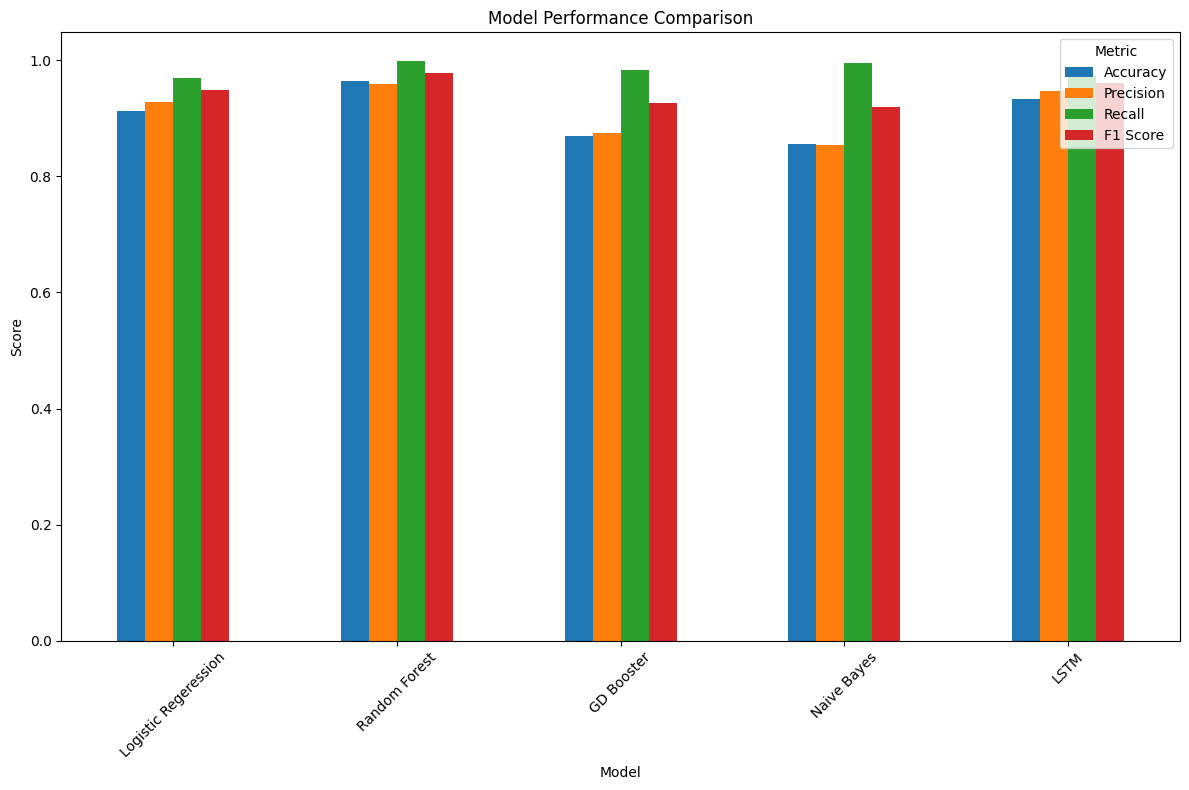

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.figure(figsize=(12, 8))
modelsMetrics.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


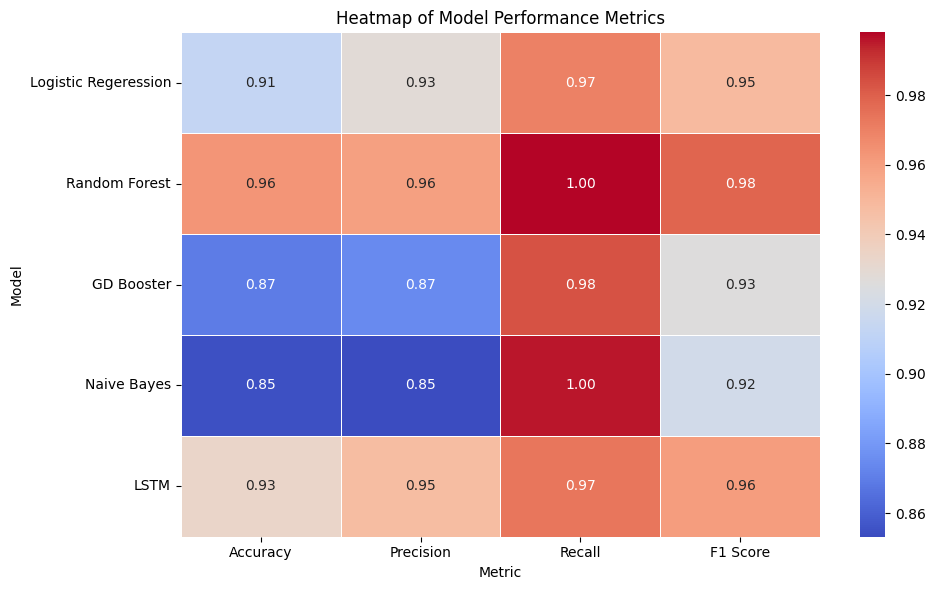

In [103]:
# Set up the heatmap
plt.figure(figsize=(10, 6))
heatmap_data = modelsMetrics.set_index('Model')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.tight_layout()
plt.show()


Conclusion

Random Forest stands out as the best-performing model due to its high accuracy, precision, recall, and F1 score. LSTM and Logistic Regression also deliver strong performance, particularly in recall. GD Booster and Naive Bayes excel in recall but have lower accuracy and F1 scores.

These results suggest that while the Random Forest model provides the best overall performance, other models like LSTM and Logistic Regression also offer high-quality predictions and might be preferred based on specific needs or constraints.